In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [249]:
train_data= pd.read_table('train.csv', sep= ',')
train_data.head()

,Store,Dept,Date,Sales,IsHoliday
0,1,1,5-Feb-14,24924.50,False
1,1,2,5-Feb-14,50605.27,False
2,1,3,5-Feb-14,13740.12,False
3,1,4,5-Feb-14,39954.04,False
4,1,5,5-Feb-14,32229.38,False


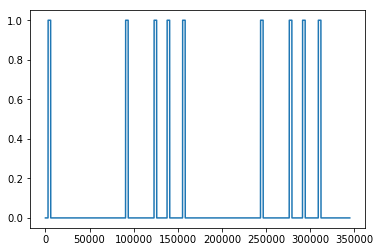

In [250]:
encode= LabelEncoder()
encode.fit(train_data['Date'])
date_enc= encode.transform(train_data['Date'])
encode.fit(train_data['IsHoliday'])
holiday_enc= encode.transform(train_data['IsHoliday'])
plt.plot(holiday_enc)
plt.show()

In [251]:
feature_data= pd.read_table('features.csv', sep= ',')
feature_data.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,5-Feb-14,5.73,2.572,211.096358,8.106,False
1,2,5-Feb-14,4.55,2.572,210.752605,8.324,False
2,3,5-Feb-14,7.62,2.572,214.424881,7.368,False
3,4,5-Feb-14,6.53,2.598,126.442065,8.623,False
4,5,5-Feb-14,4.28,2.572,211.653972,6.566,False


In [252]:
store_data= pd.read_table('stores.csv', sep= ',')
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [253]:
type_,size= [],[]
for elt in train_data['Store']:
    type_.append(store_data['Type'][elt-1])
    size.append(store_data['Size'][elt-1])

In [254]:
train_data['Type']= type_ 
train_data['Size']= size
train_data.head()

,Store,Dept,Date,Sales,IsHoliday,Type,Size
0,1,1,5-Feb-14,24924.50,False,A,151315
1,1,2,5-Feb-14,50605.27,False,A,151315
2,1,3,5-Feb-14,13740.12,False,A,151315
3,1,4,5-Feb-14,39954.04,False,A,151315
4,1,5,5-Feb-14,32229.38,False,A,151315


In [255]:
temp= []
fuel_price= []
cpi= []
unemp= []
c= 0
for elt in train_data['Store']:
    if (elt == feature_data['Store'][c]):
        temp.append(feature_data['Temperature'][c])
        fuel_price.append(feature_data['Fuel_Price'][c])
        cpi.append(feature_data['CPI'][c])
        unemp.append(feature_data['Unemployment'][c])
    else:
        c+= 1
        temp.append(feature_data['Temperature'][c])
        fuel_price.append(feature_data['Fuel_Price'][c])
        cpi.append(feature_data['CPI'][c])
        unemp.append(feature_data['Unemployment'][c])

In [256]:
train_data['Temperature']= temp
train_data['Fuel_price']= fuel_price
train_data['CPI']= cpi
train_data['Unemployment']= unemp
train_data.head()

,Store,Dept,Date,Sales,IsHoliday,Type,Size,Temperature,Fuel_price,CPI,Unemployment
0,1,1,5-Feb-14,24924.50,False,A,151315,5.73,2.572,211.096358,8.106
1,1,2,5-Feb-14,50605.27,False,A,151315,5.73,2.572,211.096358,8.106
2,1,3,5-Feb-14,13740.12,False,A,151315,5.73,2.572,211.096358,8.106
3,1,4,5-Feb-14,39954.04,False,A,151315,5.73,2.572,211.096358,8.106
4,1,5,5-Feb-14,32229.38,False,A,151315,5.73,2.572,211.096358,8.106


In [257]:
with open('test_data.pkl', 'rb') as f:
    test_data= pickle.load(f)
    
test_data.head()

,Store,Dept,Date,IsHoliday,SalesForecast,Temperature,CPI,Fuel_Price,Unemployment,Type,Size
0,1,1,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315
1,1,2,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315
2,1,3,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315
3,1,4,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315
4,1,5,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315


In [258]:
train_data['Month']= [elt.split('-')[1] for elt in train_data['Date']]
test_data['Month']= [elt.split('-')[1] for elt in test_data['Date']]
train_data.head()

,Store,Dept,Date,Sales,IsHoliday,Type,Size,Temperature,Fuel_price,CPI,Unemployment,Month
0,1,1,5-Feb-14,24924.50,False,A,151315,5.73,2.572,211.096358,8.106,Feb
1,1,2,5-Feb-14,50605.27,False,A,151315,5.73,2.572,211.096358,8.106,Feb
2,1,3,5-Feb-14,13740.12,False,A,151315,5.73,2.572,211.096358,8.106,Feb
3,1,4,5-Feb-14,39954.04,False,A,151315,5.73,2.572,211.096358,8.106,Feb
4,1,5,5-Feb-14,32229.38,False,A,151315,5.73,2.572,211.096358,8.106,Feb


In [259]:
test_data.head()

,Store,Dept,Date,IsHoliday,SalesForecast,Temperature,CPI,Fuel_Price,Unemployment,Type,Size,Month
0,1,1,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315,May
1,1,2,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315,May
2,1,3,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315,May
3,1,4,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315,May
4,1,5,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315,May


In [260]:
list_encode= ['IsHoliday', 'Type', 'Month']
encode_h= LabelEncoder()
encode_h.fit(train_data['IsHoliday'])
holiday_enc= encode_h.transform(train_data['IsHoliday'])

encode_t= LabelEncoder()
encode_t.fit(train_data['Type'])
type_enc= encode_t.transform(train_data['Type'])

encode_m= LabelEncoder()
encode_m.fit(train_data['Month'])
month_enc= encode_m.transform(train_data['Month'])
#encode the labels in above list 
#train random forest regressor
#no need to scale the data

In [261]:
train_data['holiday_enc']= holiday_enc
train_data['type_enc']= type_enc
train_data['month_enc']= month_enc
train_data.head()

,Store,Dept,Date,Sales,IsHoliday,Type,Size,Temperature,Fuel_price,CPI,Unemployment,Month,holiday_enc,type_enc,month_enc
0,1,1,5-Feb-14,24924.50,False,A,151315,5.73,2.572,211.096358,8.106,Feb,0,0,3
1,1,2,5-Feb-14,50605.27,False,A,151315,5.73,2.572,211.096358,8.106,Feb,0,0,3
2,1,3,5-Feb-14,13740.12,False,A,151315,5.73,2.572,211.096358,8.106,Feb,0,0,3
3,1,4,5-Feb-14,39954.04,False,A,151315,5.73,2.572,211.096358,8.106,Feb,0,0,3
4,1,5,5-Feb-14,32229.38,False,A,151315,5.73,2.572,211.096358,8.106,Feb,0,0,3


In [262]:
holiday_enc= encode_h.transform(test_data['IsHoliday'])
type_enc= encode_t.transform(test_data['Type'])
month_enc= encode_m.transform(test_data['Month'])
test_data['holiday_enc']= holiday_enc
test_data['type_enc']= type_enc
test_data['month_enc']= month_enc
test_data.head()

,Store,Dept,Date,IsHoliday,SalesForecast,Temperature,CPI,Fuel_Price,Unemployment,Type,Size,Month,holiday_enc,type_enc,month_enc
0,1,1,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315,May,0,0,8
1,1,2,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315,May,0,0,8
2,1,3,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315,May,0,0,8
3,1,4,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315,May,0,0,8
4,1,5,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315,May,0,0,8


In [263]:
train_data.head()

,Store,Dept,Date,Sales,IsHoliday,Type,Size,Temperature,Fuel_price,CPI,Unemployment,Month,holiday_enc,type_enc,month_enc
0,1,1,5-Feb-14,24924.50,False,A,151315,5.73,2.572,211.096358,8.106,Feb,0,0,3
1,1,2,5-Feb-14,50605.27,False,A,151315,5.73,2.572,211.096358,8.106,Feb,0,0,3
2,1,3,5-Feb-14,13740.12,False,A,151315,5.73,2.572,211.096358,8.106,Feb,0,0,3
3,1,4,5-Feb-14,39954.04,False,A,151315,5.73,2.572,211.096358,8.106,Feb,0,0,3
4,1,5,5-Feb-14,32229.38,False,A,151315,5.73,2.572,211.096358,8.106,Feb,0,0,3


In [264]:
drop_list= ['Date','IsHoliday','Type','Month']
train_data= train_data.drop(drop_list, axis= 1)
test_data= test_data.drop(drop_list, axis= 1)
train_data.head()

,Store,Dept,Sales,Size,Temperature,Fuel_price,CPI,Unemployment,holiday_enc,type_enc,month_enc
0,1,1,24924.50,151315,5.73,2.572,211.096358,8.106,0,0,3
1,1,2,50605.27,151315,5.73,2.572,211.096358,8.106,0,0,3
2,1,3,13740.12,151315,5.73,2.572,211.096358,8.106,0,0,3
3,1,4,39954.04,151315,5.73,2.572,211.096358,8.106,0,0,3
4,1,5,32229.38,151315,5.73,2.572,211.096358,8.106,0,0,3


In [265]:
test_data.head()

,Store,Dept,SalesForecast,Temperature,CPI,Fuel_Price,Unemployment,Size,holiday_enc,type_enc,month_enc
0,1,1,NaN,5.73,211.096358,2.572,8.106,151315,0,0,8
1,1,2,NaN,5.73,211.096358,2.572,8.106,151315,0,0,8
2,1,3,NaN,5.73,211.096358,2.572,8.106,151315,0,0,8
3,1,4,NaN,5.73,211.096358,2.572,8.106,151315,0,0,8
4,1,5,NaN,5.73,211.096358,2.572,8.106,151315,0,0,8


In [266]:
Y= train_data['Sales']
X= train_data.drop(['Sales'], axis= 1) 
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size= 0.1)
x_test_set= test_data.drop(['SalesForecast'], axis= 1)
x_train.head()

,Store,Dept,Size,Temperature,Fuel_price,CPI,Unemployment,holiday_enc,type_enc,month_enc
234913,4,11,205863,28.21,3.550,129.240581,5.644,0,0,1
74631,20,41,203742,24.46,2.781,204.605272,7.527,0,0,5
165356,18,94,120653,-1.95,3.437,133.614143,9.131,0,1,7
232667,14,13,200898,25.00,3.812,186.451211,8.625,0,0,1
49774,41,82,196321,13.87,2.737,189.445243,7.363,0,0,8


In [267]:
x_test_set.head()

,Store,Dept,Temperature,CPI,Fuel_Price,Unemployment,Size,holiday_enc,type_enc,month_enc
0,1,1,5.73,211.096358,2.572,8.106,151315,0,0,8
1,1,2,5.73,211.096358,2.572,8.106,151315,0,0,8
2,1,3,5.73,211.096358,2.572,8.106,151315,0,0,8
3,1,4,5.73,211.096358,2.572,8.106,151315,0,0,8
4,1,5,5.73,211.096358,2.572,8.106,151315,0,0,8


In [268]:
xxx= pd.DataFrame()
xxx[['Store','Dept','Size']]= x_test_set[['Store','Dept','Size']]
xxx[['Temperature','Fuel_price','CPI']]= x_test_set[['Temperature','Fuel_Price','CPI']]
xxx[['Unemployment','holiday_enc','type_enc','month_enc']]= x_test_set[['Unemployment','holiday_enc','type_enc','month_enc']]
xxx.head()

,Store,Dept,Size,Temperature,Fuel_price,CPI,Unemployment,holiday_enc,type_enc,month_enc
0,1,1,151315,5.73,2.572,211.096358,8.106,0,0,8
1,1,2,151315,5.73,2.572,211.096358,8.106,0,0,8
2,1,3,151315,5.73,2.572,211.096358,8.106,0,0,8
3,1,4,151315,5.73,2.572,211.096358,8.106,0,0,8
4,1,5,151315,5.73,2.572,211.096358,8.106,0,0,8


In [269]:
reg= RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [270]:
y_predict= reg.predict(x_test)
mse= mean_squared_error(y_test,y_predict)
mse

23049147.196847618

In [271]:
import math
math.sqrt(23049147)

4800.952717950886

In [272]:
y_predict_test_set= reg.predict(xxx)
y_predict_test_set[:10]

array([ 21937.283,  48307.359,  12918.242,  37785.866,  24042.544,
         5943.   ,  21065.837,  36068.29 ,  29623.323,  28543.476])

In [273]:
xxx['SalesForecast']= y_predict_test_set
xxx.head()

,Store,Dept,Size,Temperature,Fuel_price,CPI,Unemployment,holiday_enc,type_enc,month_enc,SalesForecast
0,1,1,151315,5.73,2.572,211.096358,8.106,0,0,8,21937.283
1,1,2,151315,5.73,2.572,211.096358,8.106,0,0,8,48307.359
2,1,3,151315,5.73,2.572,211.096358,8.106,0,0,8,12918.242
3,1,4,151315,5.73,2.572,211.096358,8.106,0,0,8,37785.866
4,1,5,151315,5.73,2.572,211.096358,8.106,0,0,8,24042.544


In [274]:
test_data['SalesForecast']= y_predict_test_set
test_data.head()

,Store,Dept,SalesForecast,Temperature,CPI,Fuel_Price,Unemployment,Size,holiday_enc,type_enc,month_enc
0,1,1,21937.283,5.73,211.096358,2.572,8.106,151315,0,0,8
1,1,2,48307.359,5.73,211.096358,2.572,8.106,151315,0,0,8
2,1,3,12918.242,5.73,211.096358,2.572,8.106,151315,0,0,8
3,1,4,37785.866,5.73,211.096358,2.572,8.106,151315,0,0,8
4,1,5,24042.544,5.73,211.096358,2.572,8.106,151315,0,0,8


In [275]:
with open('result_sales_forecast.pkl', 'wb') as f:
    pickle.dump(test_data,f)

In [276]:
with open('test_data.pkl', 'rb') as f:
    x_test_new= pickle.load(f)
    
x_test_new.head()

,Store,Dept,Date,IsHoliday,SalesForecast,Temperature,CPI,Fuel_Price,Unemployment,Type,Size
0,1,1,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315
1,1,2,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315
2,1,3,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315
3,1,4,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315
4,1,5,4-May-16,False,NaN,5.73,211.096358,2.572,8.106,A,151315


In [280]:
to_print= pd.DataFrame()
to_print[['Store','Dept','Date','IsHoliday']]= x_test_new[['Store','Dept','Date','IsHoliday']]
to_print['SalesForecast']= test_data['SalesForecast']

In [281]:
to_print.head()

,Store,Dept,Date,IsHoliday,SalesForecast
0,1,1,4-May-16,False,21937.283
1,1,2,4-May-16,False,48307.359
2,1,3,4-May-16,False,12918.242
3,1,4,4-May-16,False,37785.866
4,1,5,4-May-16,False,24042.544


In [298]:
to_print.to_csv('result.csv',sep= ',', index= False)

In [296]:
with open('result.csv','w')as f:
    f.write('Store,Dept,Date,IsHoliday,SalesForecast')
    for elt in list(to_print):
        for e in elt:
            f.write(e)
            f.write(',')
        f.write('\n')

S
,
t
,
o
,
r
,
e
,


D
,
e
,
p
,
t
,


D
,
a
,
t
,
e
,


I
,
s
,
H
,
o
,
l
,
i
,
d
,
a
,
y
,


S
,
a
,
l
,
e
,
s
,
F
,
o
,
r
,
e
,
c
,
a
,
s
,
t
,




In [289]:
to_print.shape, test_data.shape

((153805, 5), (153805, 11))